<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import sympy as smp
from sympy.abc import theta, phi
from sympy import *
from sympy import trigsimp
import numpy as np
from IPython.display import display, Math
smp.init_printing()

In [3]:
r, theta, x, y = smp.symbols('r theta x y')
Vx = Function('V^x', real=True)(x, y)
Vy = Function('V^y', real=True)(x, y)
Vr = Function('V^r', real=True)(r, theta)
Vtheta = Function(r'V^{\theta}', real=True)(r, theta)

# Transformation Matrix Cartesian to Polar

First we define $\Lambda$

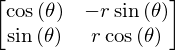

In [4]:
LAM = Matrix([[smp.cos(theta), -r*smp.sin(theta)],
              [smp.sin(theta), r*smp.cos(theta)]])
LAM

# Inverse Transformation Matrix Cartesian to Polar

Now $\Lambda^{-1}$

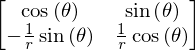

In [5]:
LAM_inv = smp.simplify(LAM**-1)
LAM_inv

# Covariant Derivative Tensor in Cartesian Coordinates

Now $\nabla V$ in cartesian coordinates.

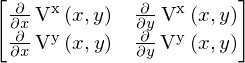

In [6]:
del_Vcart = Matrix([[diff(Vx,x), diff(Vx, y)],
                   [diff(Vy, x), diff(Vy, y)]])
del_Vcart

# Transform Coordinates of the Covariant Derivative Tensor

Compute the **components** of the matrix in polar coordinates using

$$V^x = \cos(\theta)V^r-r\sin(\theta)V^\theta \hspace{20mm} V^y = \sin(\theta)V^r+r\cos(\theta)V^\theta$$

and 

$$\frac{\partial}{\partial x}=\cos\theta \frac{\partial}{\partial r}-\frac{1}{r}\sin\theta \frac{\partial}{\partial \theta} \hspace{20mm}\frac{\partial}{\partial y}=\sin\theta \frac{\partial}{\partial r}+\frac{1}{r}\cos\theta \frac{\partial}{\partial \theta} $$

In [7]:
Vx = smp.cos(theta)*Vr-r*smp.sin(theta)*Vtheta
Vy = smp.sin(theta)*Vr+r*smp.cos(theta)*Vtheta

diff_Vx_x = smp.cos(theta)*diff(Vx, r)-(1/r)*smp.sin(theta)*diff(Vx, theta)
diff_Vy_x = smp.cos(theta)*diff(Vy, r)-(1/r)*smp.sin(theta)*diff(Vy, theta)
diff_Vx_y = smp.sin(theta)*diff(Vx, r)+(1/r)*smp.cos(theta)*diff(Vx, theta)
diff_Vy_y = smp.sin(theta)*diff(Vy, r)+(1/r)*smp.cos(theta)*diff(Vy, theta)

Print the matrix. Note that we have transformed our **components** but not our **basis**.

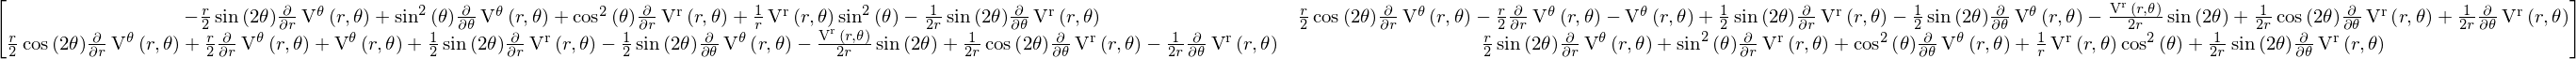

In [8]:
del_Vcart = Matrix([[diff_Vx_x, diff_Vx_y],
                   [diff_Vy_x, diff_Vy_y]])
smp.simplify(del_Vcart)

# Transform Basis of the Covariant Derivative Tensor

Now we transform our **basis** using the fact that

$$(\nabla V)_{\text{polar}} = \Lambda^{-1}(\nabla V)_{\text{cart}}\Lambda$$

This follows from

$${(\nabla V)^{\alpha'}}_{\beta'}={(\nabla V)^{\alpha}}_{\beta}{\Lambda^{\alpha'}}_{\alpha'}{(\Lambda^{-1})^{\beta}}_{\beta'} $$

This follows fro

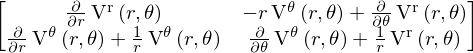

In [9]:
del_Vpolar = ((LAM_inv)*del_Vcart*(LAM))
smp.simplify(del_Vpolar)

This matches what we obtained using the Christoffel symbols in parts a) and b).